In [7]:
import tensorflow as tf
from tensorflow import keras
tf.__version__
keras.__version__

'2.4.0'

In [13]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
print(X_train_full.shape, X_train_full.shape, X_test.shape, y_test.shape)
print(X_train_full.dtype)

(60000, 28, 28) (60000, 28, 28) (10000, 28, 28) (10000,)
uint8


In [16]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Coat'

#### Create the model using Sequential

In [18]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [38]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [19]:
model.layers

In [20]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [25]:
weights, biases = hidden1.get_weights()
print(weights.shape, biases.shape)
print(weights, biases)

(784, 300) (300,)
[[-0.01519187  0.02962612 -0.05278528 ... -0.02961684 -0.03309206
  -0.05838264]
 [-0.02296909 -0.04006731  0.0277033  ... -0.0659142  -0.05658549
   0.06210314]
 [ 0.0437929   0.06542866 -0.00258838 ...  0.03124379 -0.0274764
  -0.02024817]
 ...
 [ 0.05386147  0.07140899  0.06567223 ... -0.02573976 -0.01649157
  -0.04650551]
 [ 0.0197276   0.01198941  0.0524886  ... -0.0357618   0.01106342
   0.00224496]
 [-0.02843318  0.04107537  0.06699269 ... -0.0110819  -0.07106259
   0.05438192]] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

#### Compling the model

In [26]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

#### Training & Evaluating

In [30]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))


Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2229 - accuracy: 0.9199 - val_loss: 0.2976 - val_accuracy: 0.8940
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2211 - accuracy: 0.9201 - val_loss: 0.3003 - val_accuracy: 0.8912
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2170 - accuracy: 0.9223 - val_loss: 0.2938 - val_accuracy: 0.8896
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2133 - accuracy: 0.9232 - val_loss: 0.3279 - val_accuracy: 0.8808
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2106 - accuracy: 0.9240 - val_loss: 0.2919 - val_accuracy: 0.8944
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2082 - accuracy: 0.9250 - val_loss: 0.3110 - val_accuracy: 0.8918
Epoch 7/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2032 - accuracy: 0.9271 - val_loss: 0.3203 - val_accuracy

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [37]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

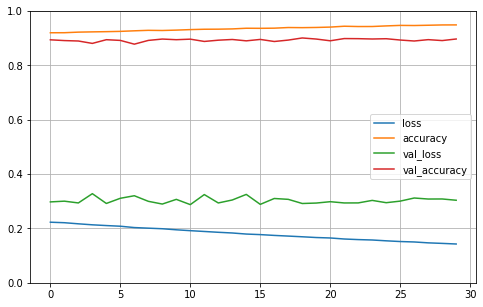

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [40]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 75.1531 - accuracy: 0.8497


[75.15306854248047, 0.8496999740600586]

#### Prediction

In [41]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [49]:
import numpy as np
np.argmax(y_proba, axis=-1)
# y_pred = model.predict_classes(X_new)
# y_pred

array([9, 2, 1])

In [50]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)